In [1]:
import os
import sys  
import json
import itertools
from collections import Counter
from ast import literal_eval
import pandas as pd
import numpy as np
from pymongo import MongoClient
from dotenv import load_dotenv
from datetime import timedelta, date
import nltk
#nltk.download('punkt')
from nltk.twitter import Query, Streamer, Twitter, TweetViewer, TweetWriter, credsfromfile

In [2]:

def get_bloggers_latest_tweets(start_date, end_date, hashtag, num_tweets):
    """
    This function takes in #blog and num_tweets and then downloads the
    'n' latest tweets for that twitter handle and save as a dataframe
    """

    import GetOldTweets3 as got

    tweetCriteria = (
        got.manager.TweetCriteria()
        .setQuerySearch(hashtag)
        .setSince(start_date)
        .setUntil(end_date)
        .setMaxTweets(num_tweets)
    )
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    tweets_list = [
        {
            "id": tweet.id, 
            "text": tweet.text, 
            "username": tweet.username, 
            "permalink": tweet.permalink, 
            "to": tweet.to, 
            "date": tweet.date, 
            "retweets": tweet.retweets, 
            "favorites": tweet.favorites, 
            "mentions": tweet.mentions, 
            "hashtags": tweet.hashtags, 
            "geo": tweet.geo, 
            "links": tweet.urls,
            "author_id": tweet.author_id,
            "formatted_date": tweet.formatted_date
        } 
        for tweet in tweets
    ]

    df = pd.DataFrame(tweets_list)
    # df.to_csv("bloggers.csv", index=False) if tweets else pd.DataFrame()

    tweet_count = len(tweets)
    return tweet_count, df


def generate_medium_handle(start_date, end_date, hashtag, number_tweets):
    """
    This function tries to extract potential bloggers from tweeter
    """
    count, df = get_bloggers_latest_tweets(start_date, end_date, hashtag, number_tweets)
    if count:
        df = df.drop_duplicates(subset = ["id"])
        return df

    return None


In [251]:
# I did this for all housemates except the HOH and DHOH for that week
start_date = str(date.today() + timedelta(days=-5))
end_date = str(date.today())

df = generate_medium_handle(start_date, end_date, "#Laycon", 1000)
print("length of medium df: {}".format(len(df)))


length of medium df: 957


In [252]:
df.to_csv('Laycon_data.csv')

In [253]:
df = pd.read_csv('Laycon_data.csv')
df

,Unnamed: 0,id,text,username,permalink,to,date,retweets,favorites,mentions,hashtags,geo,links,author_id,formatted_date
0,0,1296597801128857600,@adekunleGOLD @SympLySimi #kiddrica #bbnaija20...,kinglabi_,https://twitter.com/kinglabi_/status/129659780...,NaN,2020-08-20 23:59:40+00:00,0,0,@adekunleGOLD @SympLySimi,#kiddrica #bbnaija2020 #bbnaija2020lockdown #L...,NaN,NaN,166132540,Thu Aug 20 23:59:40 +0000 2020
1,1,1296333672430280707,"Only $2 for PCB Prototype, 24 Hours Fast Turn ...",JLCPCB,https://twitter.com/JLCPCB/status/129633367243...,NaN,2020-08-20 06:30:06+00:00,5,35,NaN,NaN,NaN,https://jlcpcb.com/v,1001371117657907200,Thu Aug 20 06:30:06 +0000 2020
2,2,1296597754249129985,Join Me tomorrow in Ikeja as we discuss how to...,petersentoday,https://twitter.com/petersentoday/status/12965...,NaN,2020-08-20 23:59:28+00:00,0,0,NaN,#kiddrica #BBNaija #Laycon #bbnaija2020lockdow...,NaN,NaN,1284552208168648704,Thu Aug 20 23:59:28 +0000 2020
3,3,1296597528247504899,Y'all she talking bout #DNA ? Or Nah? #nickimi...,BarbzsquadNG,https://twitter.com/BarbzsquadNG/status/129659...,NaN,2020-08-20 23:58:35+00:00,0,1,NaN,#DNA #nickiminajiscoming #BBNaija #Laycon #Ori...,NaN,NaN,1286265909049470976,Thu Aug 20 23:58:35 +0000 2020
4,4,1296597489760559105,Remember that Jesus loves and cares for you. Y...,Bimsply,https://twitter.com/Bimsply/status/12965974897...,NaN,2020-08-20 23:58:25+00:00,0,5,NaN,#BBNaija #bbnaija2020lockdown #kiddrica #MUFC ...,NaN,NaN,851722114432413696,Thu Aug 20 23:58:25 +0000 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,995,1296231669607927808,Poem Comedy tonight #Laycon #BBNaija,Quadrio16,https://twitter.com/Quadrio16/status/129623166...,NaN,2020-08-19 23:44:47+00:00,1,8,NaN,#Laycon #BBNaija,NaN,NaN,1063763232182149120,Wed Aug 19 23:44:47 +0000 2020
953,996,1296231347690917889,Good morning bloggers. I am happy to announce ...,NMBAwards,https://twitter.com/NMBAwards/status/129623134...,NaN,2020-08-19 23:43:30+00:00,0,1,NaN,#NMBAwards2020 #BBNaija #BBNaijaLockdown #Layc...,NaN,NaN,1296228342753112064,Wed Aug 19 23:43:30 +0000 2020
954,997,1296230919829889026,ICONS stop making mistake in your SMS vote. It...,LayconWarrior10,https://twitter.com/LayconWarrior10/status/129...,NaN,2020-08-19 23:41:48+00:00,3,15,NaN,#BBNaija #VoteToSaveLaycon #Laycon,NaN,NaN,1295155740647317504,Wed Aug 19 23:41:48 +0000 2020
955,998,1296230348863528961,Choose your fav and retweet. . #BBNaija #bbnai...,___kylex,https://twitter.com/___kylex/status/1296230348...,___kylex,2020-08-19 23:39:32+00:00,0,2,NaN,#BBNaija #bbnaijialockdown #Laycon #BBNaijaLoc...,NaN,https://twitter.com/___kylex/status/1296203288...,2725199667,Wed Aug 19 23:39:32 +0000 2020


In [254]:
df.columns

Index(['Unnamed: 0', 'id', 'text', 'username', 'permalink', 'to', 'date',
       'retweets', 'favorites', 'mentions', 'hashtags', 'geo', 'links',
       'author_id', 'formatted_date'],
      dtype='object')

In [255]:
#df_new = df[df['links']!= ""]
#df_new

In [256]:
type(df['text'])

pandas.core.series.Series

In [257]:
#coverting data type from series to string
df = pd.Series.to_string(df['text'])
# changing all to lower cases
df = df.lower()
#removing whitespaces
df = df.strip()
from string import punctuation as punc
for ch in punc:
    if ch in df:
        df = df.replace(ch, '')
data = df.split('\n')
data

['0      adekunlegold symplysimi kiddrica bbnaija20',
 '1      only 2 for pcb prototype 24 hours fast turn ',
 '2      join me tomorrow in ikeja as we discuss how to',
 '3      yall she talking bout dna  or nah nickimi',
 '4      remember that jesus loves and cares for you y',
 '5      httpswwwinstagramcompceimiyihayigsh',
 '6      laycon voice wen he talks gosh i love love it ',
 '7      all available for 2500 each if you’re seein',
 '8      mbuharis twitter handle is the biggest and m',
 '9      juiceworlddd if you are experiencin break up',
 '10     offer ends on monday2500 each bbnaija kid',
 '11     see him small mouth with him iconic chewing',
 '12     legend laycon i love this hair style bbnaijia',
 '13     bbnaijialockdown2020 laycon nowplaying list',
 '14      i wish he is touching something oh laycon l',
 '15      is like brother ozo is playing the real mans',
 '16     which night shit do you enjoy more this week ',
 '17     out now worldwide  httpstepidzstreamlink',
 '18    

In [258]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [259]:
data[-1]

'956    choose your fav and retweet  bbnaija bbnai'

In [260]:
vader.polarity_scores(data[-1])

{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}

In [261]:
sentiment_analysis = []
for doc in data:
    score = vader.polarity_scores(doc)
    if score['compound'] > 0:
        sentiment_analysis.append('POS')
    elif score['compound'] < 0:
        sentiment_analysis.append('NEG')
    else:
        sentiment_analysis.append('NEU')
sentiment_analysis

['NEU',
 'NEU',
 'POS',
 'NEG',
 'POS',
 'NEU',
 'POS',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'POS',
 'NEU',
 'POS',
 'POS',
 'NEG',
 'NEU',
 'NEG',
 'POS',
 'POS',
 'NEU',
 'POS',
 'NEG',
 'POS',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'POS',
 'NEU',
 'NEU',
 'NEU',
 'NEG',
 'NEU',
 'NEU',
 'POS',
 'POS',
 'NEU',
 'NEU',
 'NEU',
 'POS',
 'NEU',
 'POS',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEG',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'POS',
 'NEU',
 'NEU',
 'POS',
 'NEU',
 'NEU',
 'NEU',
 'NEG',
 'POS',
 'NEU',
 'POS',
 'NEU',
 'POS',
 'POS',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEG',
 'POS',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEU',
 'NEG',
 'NEU',
 'POS',
 'NEU',
 'NEU',
 'NEG',
 'NEG',
 'POS',
 'NEU',
 'NEU',
 'POS',
 'NEU',
 'NEG',
 'NEG',
 'NEU',
 'NEU',
 'NEG',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'POS',
 'NEU',
 'NEU',
 'NEU',
 'POS',
 'POS',
 'POS',
 'POS',
 'NEU',
 'POS',
 'NEU',
 'POS',
 'NEU',
 'POS',
 'NEU',
 'NEU',
 'POS',
 'NEU',


In [262]:
len(sentiment_analysis)

957

In [263]:
len(data)

957

In [264]:
sentiment_data = pd.DataFrame(sentiment_analysis)
sentiment_data

,0
0,NEU
1,NEU
2,POS
3,NEG
4,POS
...,...
952,POS
953,POS
954,NEG
955,POS


In [265]:
sentiment_data.to_csv('Laycon.csv')

In [2]:
Ozo = pd.read_csv('Ozo.csv')
Ozo = Ozo.rename(columns = {'0': 'Ozo'})
Nengi = pd.read_csv('Nengi.csv')
Nengi= Nengi.rename(columns = {'0': 'Nengi'})
Dora = pd.read_csv('Dora.csv')
Dora= Dora.rename(columns = {'0': 'Dora'})
Prince = pd.read_csv('Prince.csv')
Prince= Prince.rename(columns = {'0': 'Prince'})
Tolanibaj = pd.read_csv('Tolanibaj.csv')
Tolanibaj= Tolanibaj.rename(columns = {'0': 'Tolanibaj'})
Vee = pd.read_csv('Vee.csv')
Vee= Vee.rename(columns = {'0': 'Vee'})
Neo = pd.read_csv('Neo.csv')
Neo= Neo.rename(columns = {'0': 'Neo'})
Praise = pd.read_csv('Praise.csv')
Praise= Praise.rename(columns = {'0': 'Praise'})
Lucy = pd.read_csv('Lucy.csv')
Lucy= Lucy.rename(columns = {'0': 'Lucy'})
Brighto = pd.read_csv('Brighto.csv')
Brighto= Brighto .rename(columns = {'0': 'Brighto'})
Wathoni = pd.read_csv('Wathoni.csv')
Wathoni= Wathoni.rename(columns = {'0': 'Wathoni'})
Trickytee = pd.read_csv('Trickytee.csv')
Trickytee= Trickytee.rename(columns = {'0': 'Trickytee'})
Laycon= pd.read_csv('Laycon.csv')
Laycon= Laycon.rename(columns = {'0': 'Laycon'})

In [6]:
week_5 = pd.concat([Ozo, Nengi, Dora, Prince, Tolanibaj, Vee, Neo, Praise, Lucy, Brighto, Wathoni, Trickytee, Laycon], axis = 1, sort = False)
week_5 = week_5.drop('Unnamed: 0', axis = 1)
#type(week_5)
#pd.Series.to_list(week_5)
week_5

,Ozo,Nengi,Dora,Prince,Tolanibaj,Vee,Neo,Praise,Lucy,Brighto,Wathoni,Trickytee,Laycon
0,POS,POS,POS,NEU,NEU,NEU,NEU,POS,POS,POS,POS,NEU,NEU
1,POS,NEU,NEU,NEU,NEU,POS,NEU,NEU,NEU,NEU,NEU,POS,NEU
2,NEU,NEU,POS,NEG,NEG,NEU,NEU,POS,NEU,NEG,POS,POS,POS
3,NEU,NEU,NEU,NEU,NEU,NEU,NEU,POS,POS,POS,POS,POS,NEG
4,NEU,NEU,POS,POS,POS,NEU,NEU,POS,NEU,POS,POS,NEG,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NEU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NEU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NEU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,POS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data = week_5
dict_ = {}
for each in data.columns:dict_[each] = data[each].value_counts()
data = pd.DataFrame(dict_).transpose().replace(to_replace=np.nan,value=0)
data

,NEG,NEU,POS
Ozo,143,456,358
Nengi,149,451,359
Dora,58,241,138
Prince,107,616,277
Tolanibaj,118,490,350
Vee,141,400,399
Neo,7,65,22
Praise,75,286,596
Lucy,107,640,212
Brighto,136,511,310


In [33]:
data = data.drop('NEU', axis=1)
data

,NEG,POS
Ozo,143,358
Nengi,149,359
Dora,58,138
Prince,107,277
Tolanibaj,118,350
Vee,141,399
Neo,7,22
Praise,75,596
Lucy,107,212
Brighto,136,310


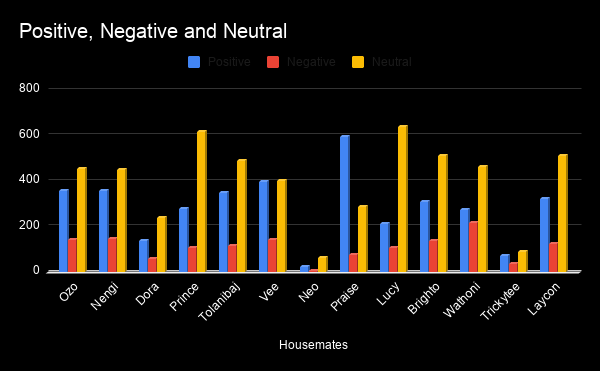

In [8]:
from  PIL import Image
#I used excel in visualizing my dataset
img = Image.open('Positive, Negative and Neutral.png')
img

In [34]:
data = data['POS'] - data['NEG']
data

Ozo          215
Nengi        210
Dora          80
Prince       170
Tolanibaj    232
Vee          258
Neo           15
Praise       521
Lucy         105
Brighto      174
Wathoni       60
Trickytee     33
Laycon       196
dtype: int64

In [35]:
data= pd.DataFrame(data)
data

,0
Ozo,215
Nengi,210
Dora,80
Prince,170
Tolanibaj,232
Vee,258
Neo,15
Praise,521
Lucy,105
Brighto,174


In [36]:
data = data.rename(columns={'0': 'Possible Eviction'})

In [37]:
data

,0
Ozo,215
Nengi,210
Dora,80
Prince,170
Tolanibaj,232
Vee,258
Neo,15
Praise,521
Lucy,105
Brighto,174


In [49]:
data = data.sort_values(by = [0], ascending = False)
data

,0
Praise,521
Vee,258
Tolanibaj,232
Ozo,215
Nengi,210
Laycon,196
Brighto,174
Prince,170
Lucy,105
Dora,80


In [50]:
data.to_csv('data.csv')

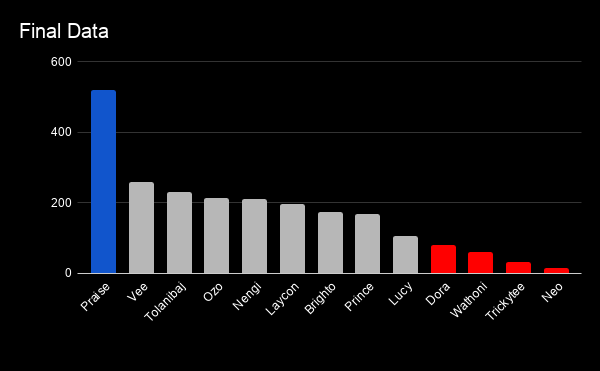

In [6]:
img_2 = Image.open('Final Data.png')
img_2

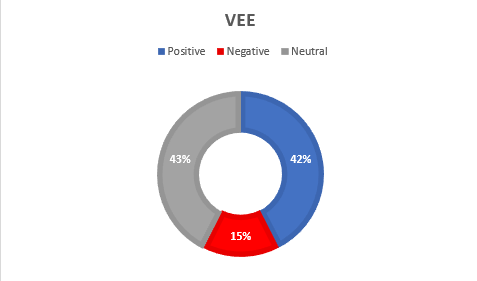

In [10]:
#then i did this for all housemates using excel
img_3= Image.open('vee.png')
img_3